In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from pyclustering.cluster.cure import cure
from pyclustering.utils import timedcall
from src.utils_clustering import plot_clusters, evaluate_clustering, load_labels_from_file

In [48]:
FILE_NAME = "s1"
file_path = rf'..\data\processed\{FILE_NAME}.txt'
processed_data = pd.read_csv(file_path)

In [49]:
# Convert DataFrame to list of tuples for pyclustering
data_tuples = processed_data.to_records(index=False).tolist()

# Apply CURE clustering
cure_instance = cure(data_tuples, 15)  # 15 clusters
(ticks, _) = timedcall(cure_instance.process)

# Extract cluster labels
clusters = cure_instance.get_clusters()
labels_pred = [0] * len(data_tuples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels_pred[index] = cluster_id


In [50]:
from collections import Counter

cluster_distribution = Counter(labels_pred)
print(cluster_distribution)

Counter({6: 358, 1: 358, 11: 354, 4: 351, 10: 346, 12: 341, 7: 335, 14: 333, 0: 333, 9: 327, 2: 325, 13: 314, 5: 313, 3: 312, 8: 300})


In [51]:
FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{FILE_NAME}.pa', len(labels_pred))

cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


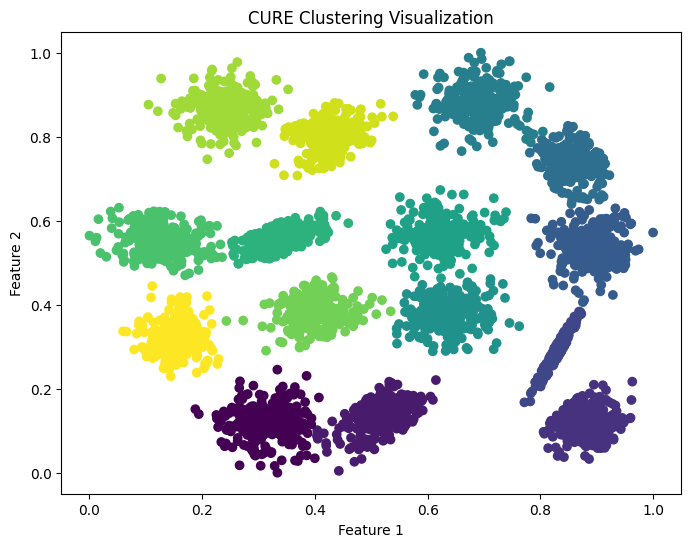

Clustering Evaluation
Adjusted Mutual Information (AMI): 0.9854965916153998
Adjusted Rand Index (ARI): 0.984117124173696
Calinski and Harabasz Score: 22416.092985562856
Davies-Bouldin Score: 0.36577442585812003
Completeness Score: 0.9856605142468057
Fowlkes-Mallows Score: 0.9851756758688217
Homogeneity: 0.9855445940346412, Completeness: 0.9856605142468057, V-Measure: 0.9856025507322766
Homogeneity Score: 0.9855445940346412
Mutual Information: 2.6678396091990937
Normalized Mutual Information: 0.9856025507322765
Rand Score: 0.9980240848169634
Silhouette Score: 0.7097291963212963
V-Measure Score: 0.9856025507322766

----------------------------------------


In [52]:
plot_clusters(processed_data, labels_pred, title='CURE Clustering Visualization')
evaluate_clustering(processed_data, labels_true, labels_pred)
